In [21]:
import os
from matplotlib import pyplot as plt

In [25]:
original_image_dir = '/school/CSCI_2470/COD_Project/data/Test/Image'
pred_mask_dir = '/school/CSCI_2470/COD_Project/results/predictions_archive_80'
refined_masked_image_dir = '/school/CSCI_2470/COD_Project/results/refined_archive_80/masked_img'
gt_mask_dir = '/school/CSCI_2470/COD_Project/data/Test/GT_Object'

In [30]:
image_name = 'COD10K-CAM-3-Flying-64-Moth-4450'
original_image_path = os.path.join(original_image_dir, image_name) + '.jpg'
pred_mask_path = os.path.join(pred_mask_dir, image_name) + '.png'
refined_masked_image_path = os.path.join(refined_masked_image_dir, image_name) + '.jpg'
gt_mask_path = os.path.join(gt_mask_dir, image_name) + '.png'
assert os.path.exists(original_image_path), f'Original image not found: {original_image_dir}'
assert os.path.exists(pred_mask_path), f'Predicted mask not found: {pred_mask_dir}'
assert os.path.exists(refined_masked_image_path), f'Refined masked image not found: {refined_masked_image_dir}'
assert os.path.exists(gt_mask_path), f'Ground truth mask not found: {gt_mask_dir}'

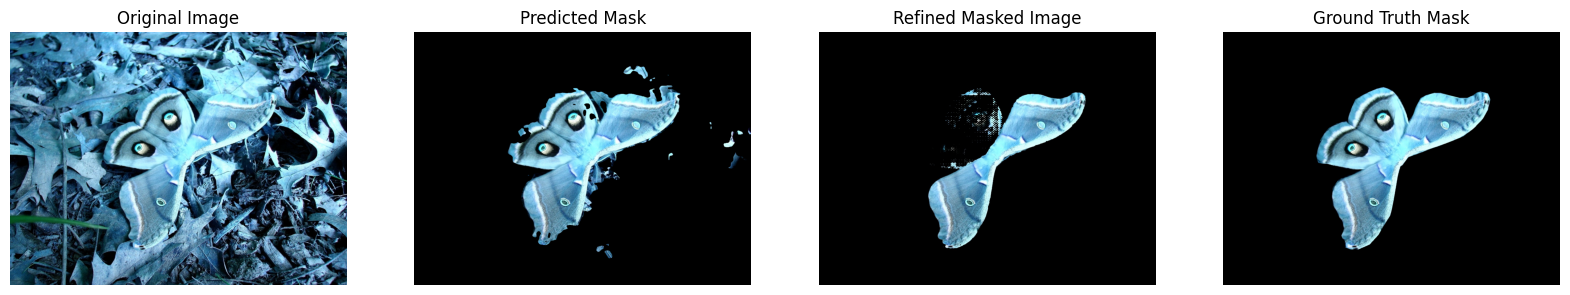

In [31]:
# produce masked image over predicted mask
from weakref import ref
import cv2
import numpy as np
original_image = cv2.imread(original_image_path)
pred_mask = cv2.imread(pred_mask_path, cv2.IMREAD_GRAYSCALE)
pred_mask = cv2.resize(pred_mask, (original_image.shape[1], original_image.shape[0]))
masked_pred_image = cv2.bitwise_and(original_image, original_image, mask=pred_mask)
gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
gt_mask = cv2.resize(gt_mask, (original_image.shape[1], original_image.shape[0]))
masked_gt_image = cv2.bitwise_and(original_image, original_image, mask=gt_mask)

refined_masked_image = cv2.imread(refined_masked_image_path)
refined_masked_image = cv2.cvtColor(refined_masked_image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(masked_pred_image)
ax[1].set_title('Predicted Mask')
ax[1].axis('off')
ax[2].imshow(refined_masked_image)
ax[2].set_title('Refined Masked Image')
ax[2].axis('off')
ax[3].imshow(masked_gt_image)
ax[3].set_title('Ground Truth Mask')
ax[3].axis('off')
plt.show()